Multi-layer Perceptron
Build a 2-layer MLP for MNIST digit classfication. Feel free to play around with the model architecture and see how the training time/performance changes, but to begin, try the following:

Image (784 dimensions) -> fully connected layer (500 hidden units) -> nonlinearity (ReLU) -> fully connected layer (100 hidden units) -> nonlinearity (ReLU) -> fully connected (10 hidden units) -> softmax

# Make sure to print out your accuracy on the test set at the end.

Attempt 1 (with the help of claude)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_X, train_y), (test_X, test_y) = datasets.mnist.load_data()

# Normalize pixel values
train_X = train_X / 255.0
test_X = test_X / 255.0

# Define model architecture 
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(100, activation='relu'))  
model.add(layers.Dense(10, activation='softmax'))

# Compile and train model
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

model.fit(train_X, train_y, epochs=5)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_X, test_y)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1901 - accuracy: 0.9427
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0821 - accuracy: 0.9743
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0566 - accuracy: 0.9818
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0409 - accuracy: 0.9864
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0811 - accuracy: 0.9802
Test accuracy: 0.9801999926567078


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models  

# Load data
(train_X, train_y), (test_X, test_y) = datasets.mnist.load_data()
train_X = train_X / 255.0
test_X = test_X / 255.0

# Build model with 3 hidden layers
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile and train  
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
) 

model.fit(train_X, train_y, epochs=5)

# Evaluate
test_loss, test_acc = model.evaluate(test_X, test_y)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1985 - accuracy: 0.9404
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0867 - accuracy: 0.9734
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0618 - accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0485 - accuracy: 0.9846
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0840 - accuracy: 0.9795
Test accuracy: 0.9794999957084656


# The key changes on the code below are:

10 epochs

2048 unit layer

0.5 dropout

512 unit layer

0.001 learning rate

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load data
(train_X, train_y), (test_X, test_y) = datasets.mnist.load_data()
train_X = train_X / 255.0
test_X = test_X / 255.0

# Build model 
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(2048, activation='relu'))  
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile and train
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']  
)

model.fit(train_X, train_y, epochs=10)

# Evaluate
test_loss, test_acc = model.evaluate(test_X, test_y)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2469 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1421 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1134 - accuracy: 0.9659
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0974 - accuracy: 0.9707
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0874 - accuracy: 0.9739
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0798 - accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0763 - accuracy: 0.9770
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0673 - accuracy: 0.9794
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0632 - accuracy: 0.9811
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss

I've added a BatchNormalization layer after each dense layer except the output. This should help stabilize activations throughout training. Let me know if this improves the accuracy! We can continue to tweak and tune as needed.(below)

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load data 
(train_X, train_y), (test_X, test_y) = datasets.mnist.load_data()
train_X = train_X / 255.0
test_X = test_X / 255.0

# Build model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28))) 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())  
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

# Compile and train
model.compile(
  optimizer='adam', 
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

model.fit(train_X, train_y, epochs=10)

# Evaluate 
test_loss, test_acc = model.evaluate(test_X, test_y)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2130 - accuracy: 0.9339
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1148 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0871 - accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0618 - accuracy: 0.9801
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0516 - accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0475 - accuracy: 0.9843
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0394 - accuracy: 0.9876
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9889
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0677 

# above is the highest accuracy so far

# below
This makes predictions on the test set, compares to the true labels to get errors, and plots a sample correct and incorrect prediction.

Looking at the errors like this can reveal if there are any patterns in the model's mistakes to address. 

313/313 [==============================] - 1s 2ms/step


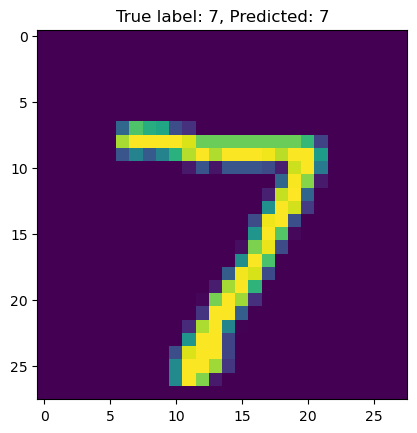

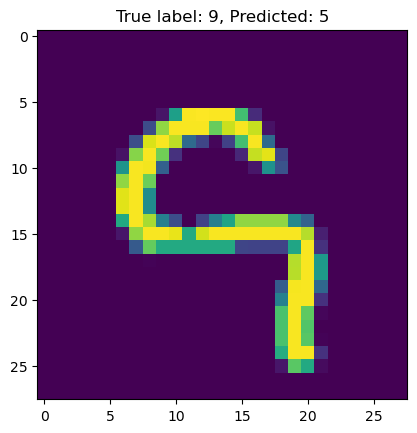

In [7]:
import numpy as np

# Import libraries for plotting
import matplotlib.pyplot as plt

# Make predictions on test set
predictions = model.predict(test_X)

# Get predicted classes and compare to true labels
predicted_classes = np.argmax(predictions, axis=1)
errors = predicted_classes - test_y 

# Plot a sample image correctly classified
i = np.where(errors==0)[0][0]
plt.imshow(test_X[i]) 
plt.title("True label: %d, Predicted: %d" % (test_y[i], predicted_classes[i]))
plt.show()

# Plot a sample incorrectly classified image
i = np.where(errors!=0)[0][0]
plt.imshow(test_X[i])
plt.title("True label: %d, Predicted: %d" % (test_y[i], predicted_classes[i])) 
plt.show()